In [9]:
!pip install geopy

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.cluster import KMeans

In [14]:
# Specify the file path
file_path = "C:\\Users\\SIVUYILE\\Downloads\\stakeholder_analysis_data.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [16]:
data.head()

,Timestamp,Level,What department are you in?,How many years have you been with the company?,Latitude and Longitude,What is your pincode? (optional),"How long, in minutes, is your current commute on average?",How do you commute?,What is your age?,What is your gender?,Are you married?,How many children do you have?,Which do you live in?,Is having daycares / schools near your office important to you?,"If your office considered shifting, would you like to stay living where you are?",Please enter the pincode of where you would like to live (optional),Would you prefer salary raises or more work from home option?
0,11/04/2024 08:25:00,Manager,HR,5.33,"-36.006308, -175.487338",204955,57,Public transport,38,Other,Yes,1,Rented House,No,Yes,101449,More work from home option
1,09/27/2024 19:53:00,Non executive,Finance,13.88,"-53.751763, 95.504568",209436,36,Walk,54,Other,No,4,Apartment,No,No,979786,Salary raises
2,07/17/2024 08:38:00,Manager,IT,9.79,"62.682825, -28.206958",166702,100,Public transport,57,Man,Yes,3,Rented House,Yes,Yes,256980,Salary raises
3,10/20/2024 00:46:00,Senior Manager,Marketing,7.79,"-88.409224, 122.626854",897889,92,Bicycle,33,Woman,No,3,Hostel,Yes,Yes,297727,More work from home option
4,11/09/2024 06:04:00,Non executive,Customer Support,10.87,"71.648379, 17.628008",773137,56,Public transport,54,Other,Yes,0,Hostel,No,No,224531,More work from home option


In [17]:
# Split Latitude and Longitude into separate columns
data[['Latitude', 'Longitude']] = data['Latitude and Longitude'].str.split(',', expand=True)

# Convert Latitude and Longitude to numeric values
data['Latitude'] = pd.to_numeric(data['Latitude'].str.strip())
data['Longitude'] = pd.to_numeric(data['Longitude'].str.strip())

# Drop any rows with missing data (optional)
data = data.dropna()

# Display updated data
data.head()


,Timestamp,Level,What department are you in?,How many years have you been with the company?,Latitude and Longitude,What is your pincode? (optional),"How long, in minutes, is your current commute on average?",How do you commute?,What is your age?,What is your gender?,Are you married?,How many children do you have?,Which do you live in?,Is having daycares / schools near your office important to you?,"If your office considered shifting, would you like to stay living where you are?",Please enter the pincode of where you would like to live (optional),Would you prefer salary raises or more work from home option?,Latitude,Longitude
0,11/04/2024 08:25:00,Manager,HR,5.33,"-36.006308, -175.487338",204955,57,Public transport,38,Other,Yes,1,Rented House,No,Yes,101449,More work from home option,-36.006308,-175.487338
1,09/27/2024 19:53:00,Non executive,Finance,13.88,"-53.751763, 95.504568",209436,36,Walk,54,Other,No,4,Apartment,No,No,979786,Salary raises,-53.751763,95.504568
2,07/17/2024 08:38:00,Manager,IT,9.79,"62.682825, -28.206958",166702,100,Public transport,57,Man,Yes,3,Rented House,Yes,Yes,256980,Salary raises,62.682825,-28.206958
3,10/20/2024 00:46:00,Senior Manager,Marketing,7.79,"-88.409224, 122.626854",897889,92,Bicycle,33,Woman,No,3,Hostel,Yes,Yes,297727,More work from home option,-88.409224,122.626854
4,11/09/2024 06:04:00,Non executive,Customer Support,10.87,"71.648379, 17.628008",773137,56,Public transport,54,Other,Yes,0,Hostel,No,No,224531,More work from home option,71.648379,17.628008


count    100.000000
mean      56.960000
std       33.666793
min        5.000000
25%       27.250000
50%       56.500000
75%       86.000000
max      119.000000
Name: How long, in minutes, is your current commute on average?, dtype: float64


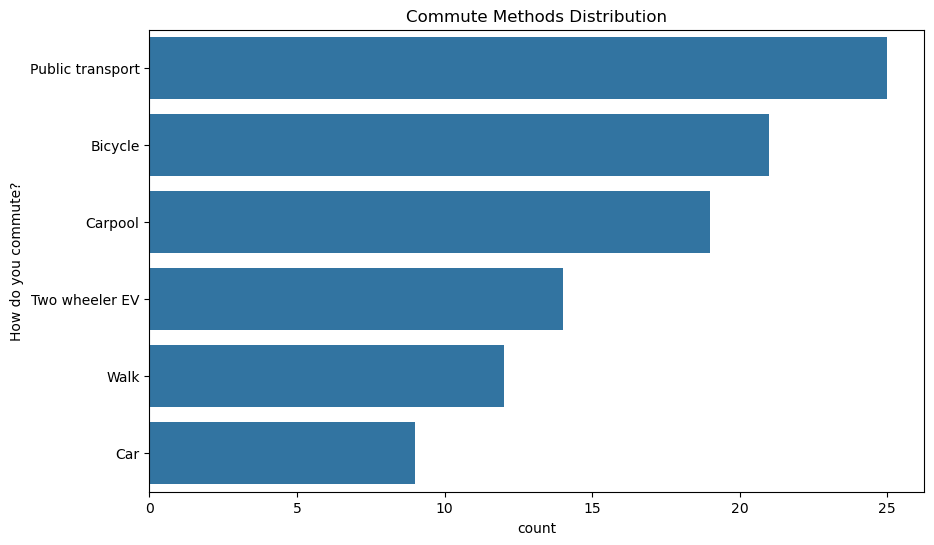

In [18]:
# Calculate summary statistics for commute times
commute_stats = data['How long, in minutes, is your current commute on average?'].describe()
print(commute_stats)

# Visualize commute methods
plt.figure(figsize=(10, 6))
sns.countplot(y='How do you commute?', data=data, order=data['How do you commute?'].value_counts().index)
plt.title('Commute Methods Distribution')
plt.show()


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


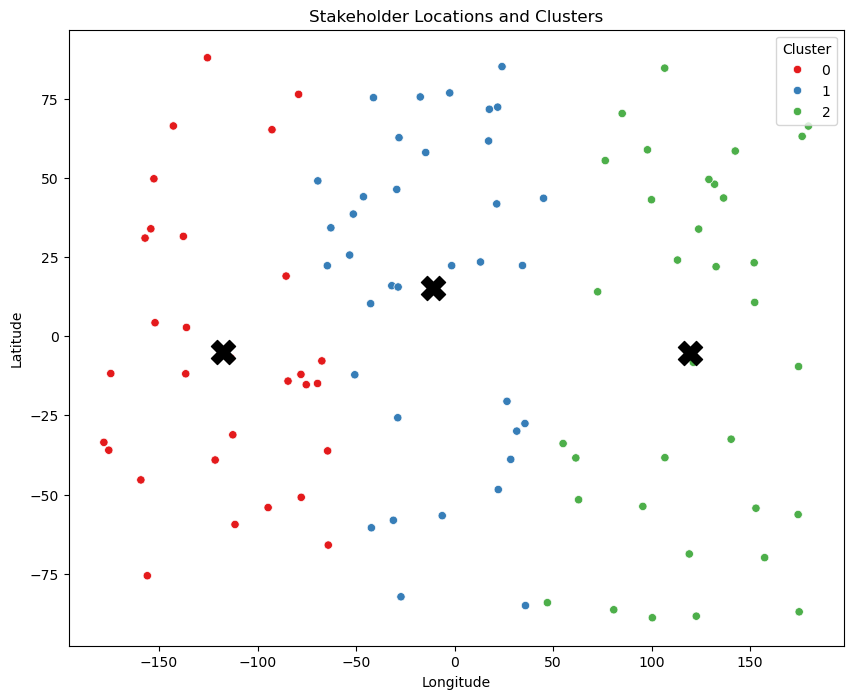

In [24]:
# Prepare data for clustering (using only latitude and longitude)
coords = data[['Latitude', 'Longitude']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(coords)

# Add cluster labels to the data
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data, palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='black', marker='X')
plt.title('Stakeholder Locations and Clusters')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
le = LabelEncoder()
data['Level_encoded'] = le.fit_transform(data['Level'])
data['Department_encoded'] = le.fit_transform(data['What department are you in?'])
data['Commute_method_encoded'] = le.fit_transform(data['How do you commute?'])
data['Gender_encoded'] = le.fit_transform(data['What is your gender?'])

# Select features and target variable
features = data[['Level_encoded', 'Department_encoded', 'How many years have you been with the company?', 
                 'Latitude', 'Longitude', 'What is your age?', 'Commute_method_encoded']]
target = data['How long, in minutes, is your current commute on average?']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 996.2784833333333
R-squared Score: 0.009711660798459198


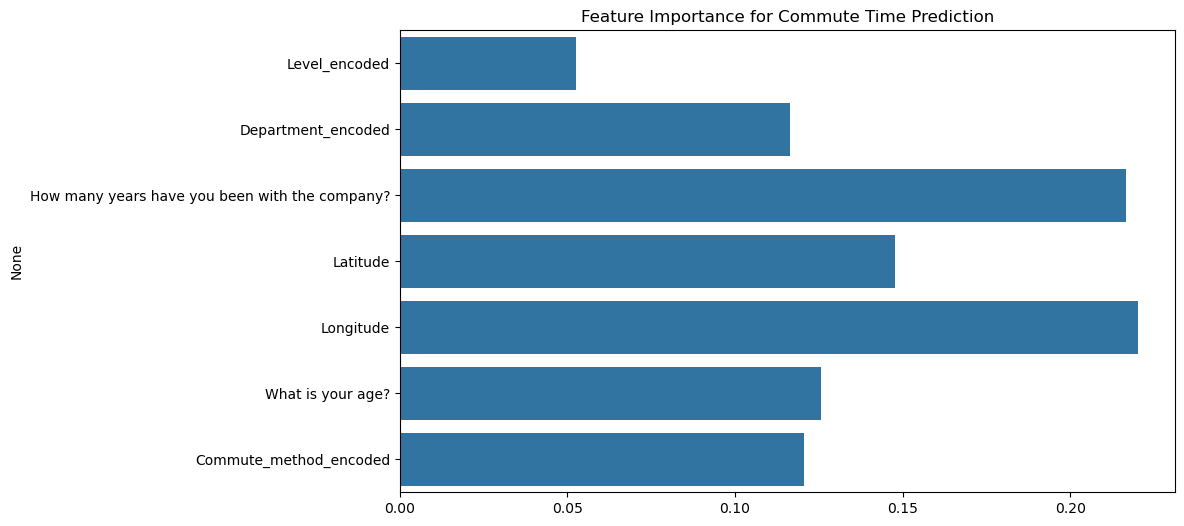

In [32]:
# Feature importance
importances = model.feature_importances_
feature_names = features.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Commute Time Prediction')
plt.show()


In [34]:
# Test locations for new office (you can define multiple)
potential_locations = [
    (-36.006308, -175.487338),  # Example location 1
    (-53.751763, 95.504568)     # Example location 2
]

def simulate_commute(location, data):
    data['Distance from New Location (km)'] = data.apply(
        lambda row: geodesic(location, (row['Latitude'], row['Longitude'])).km, axis=1)
    # Estimate new commute time based on distance (assuming linear relationship)
    data['Estimated Commute Time (mins)'] = model.predict(scaler.transform(data[features.columns]))
    avg_commute = data['Estimated Commute Time (mins)'].mean()
    return avg_commute

# Evaluate impact of each potential location
for loc in potential_locations:
    avg_commute = simulate_commute(loc, data)
    print(f"Average estimated commute time if office is relocated to {loc}: {avg_commute:.2f} mins")


Average estimated commute time if office is relocated to (-36.006308, -175.487338): 57.17 mins
Average estimated commute time if office is relocated to (-53.751763, 95.504568): 57.17 mins


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


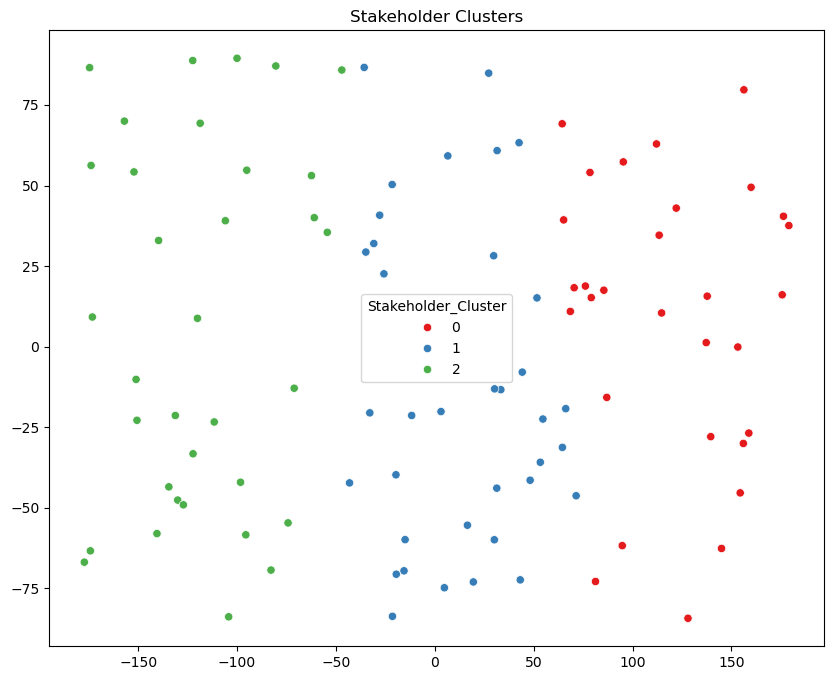

In [38]:
from sklearn.decomposition import PCA

# Prepare data for clustering using the correct column names
clustering_features = data[['What is your age?', 'Latitude', 'Longitude', 'Commute_method_encoded', 'How many years have you been with the company?']]

# Perform PCA for dimensionality reduction (optional, for visualization)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(reduced_features)
data['Stakeholder_Cluster'] = kmeans.labels_

# Visualize the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data['Stakeholder_Cluster'], palette='Set1')
plt.title('Stakeholder Clusters')
plt.show()


In [40]:
from sklearn.neighbors import NearestNeighbors

# Fit a Nearest Neighbors model
location_features = data[['Latitude', 'Longitude']]
nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(location_features)

# Example: Recommending the nearest optimal locations for a new stakeholder
new_stakeholder_location = np.array([-36.006308, -175.487338]).reshape(1, -2)
distances, indices = nbrs.kneighbors(new_stakeholder_location)
recommended_locations = location_features.iloc[indices[0]]

print("Recommended nearby office locations based on existing stakeholders:")
print(recommended_locations)


Recommended nearby office locations based on existing stakeholders:
     Latitude   Longitude
0  -36.006308 -175.487338
37 -33.530082 -177.974317
45 -45.387385 -159.205794


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [42]:
# Add new features or transformations if needed
data['Years_Category'] = pd.cut(data['How many years have you been with the company?'], bins=[0, 5, 10, 20, 50], labels=[1, 2, 3, 4])
data['Commute Time Category'] = pd.cut(data['How long, in minutes, is your current commute on average?'], bins=[0, 15, 30, 60, 120], labels=[1, 2, 3, 4])

# Recalculate encoded variables
data['Level_encoded'] = le.fit_transform(data['Level'])
data['Department_encoded'] = le.fit_transform(data['What department are you in?'])
data['Commute_method_encoded'] = le.fit_transform(data['How do you commute?'])
data['Gender_encoded'] = le.fit_transform(data['What is your gender?'])


In [44]:
# Detect outliers using IQR
Q1 = data['How long, in minutes, is your current commute on average?'].quantile(0.25)
Q3 = data['How long, in minutes, is your current commute on average?'].quantile(0.75)
IQR = Q3 - Q1

# Define a range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['How long, in minutes, is your current commute on average?'] >= lower_bound) & 
            (data['How long, in minutes, is your current commute on average?'] <= upper_bound)]


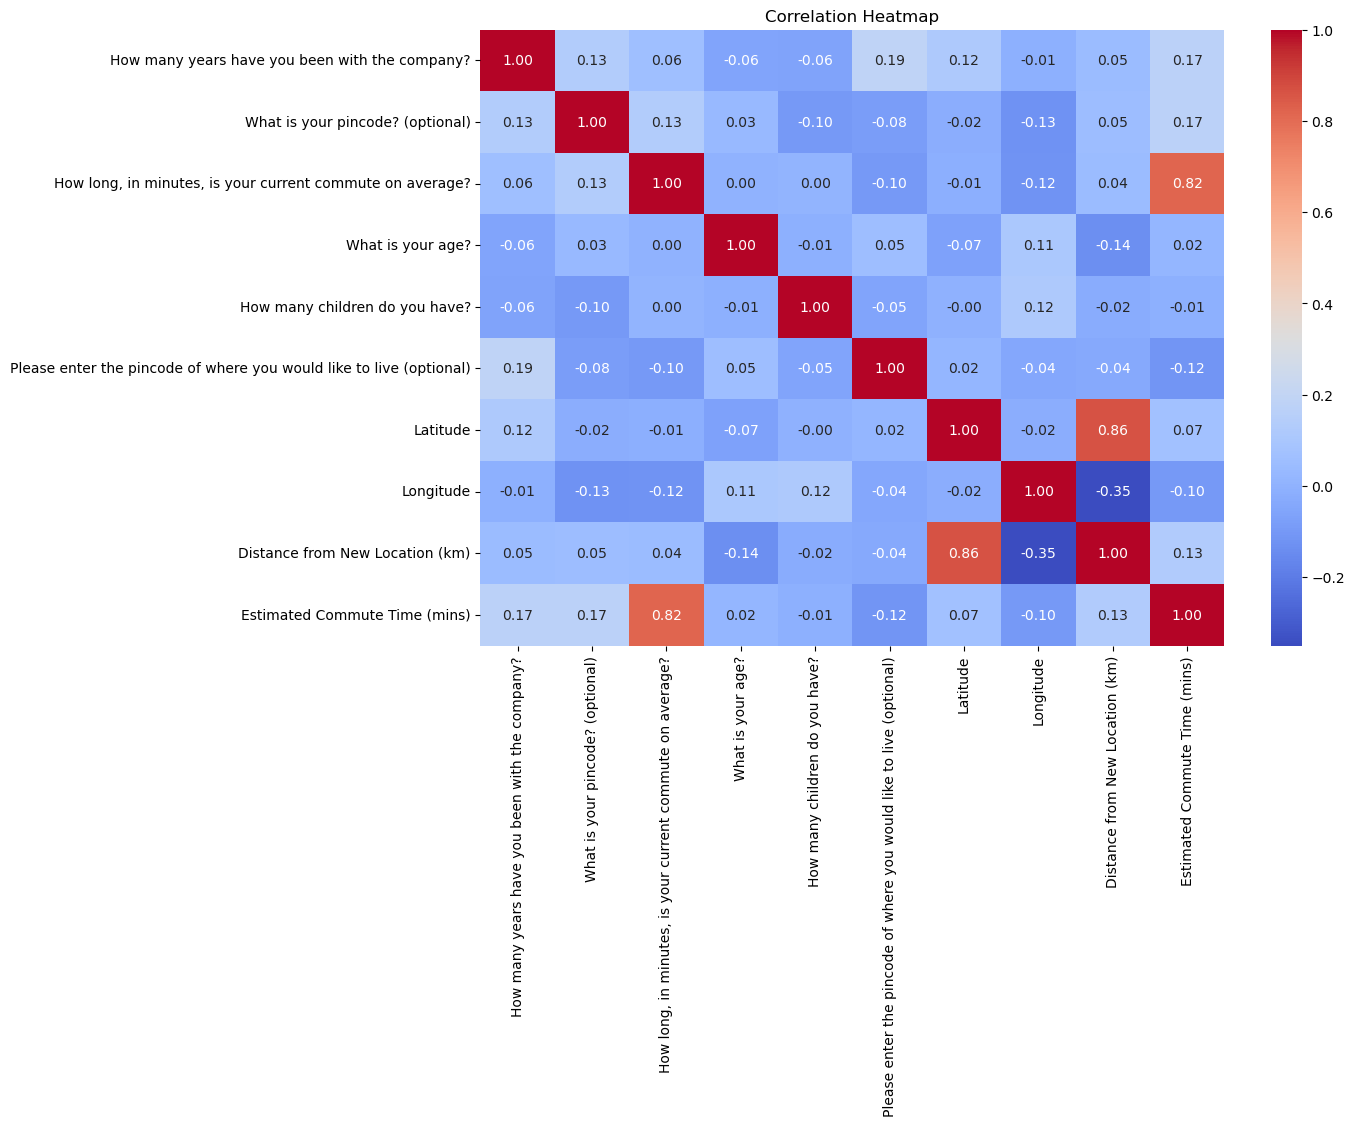

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Drop non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Mean Squared Error: {mse}')
print(f'Optimized R-squared Score: {r2}')


Optimized Mean Squared Error: 994.4106146419257
Optimized R-squared Score: 0.01156829889233002


In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Mean Squared Error: {mse}')
print(f'Optimized R-squared Score: {r2}')


Optimized Mean Squared Error: 994.4106146419257
Optimized R-squared Score: 0.01156829889233002


In [53]:
from sklearn.model_selection import cross_val_score

# Evaluate the model with cross-validation
cv_mse = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
cv_r2 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2').mean()

print(f'Cross-Validated MSE: {cv_mse}')
print(f'Cross-Validated R-squared: {cv_r2}')


Cross-Validated MSE: 1416.5051546850393
Cross-Validated R-squared: -0.2916855297794972
